In [44]:
# !pip install pyjwt==1.6.4
import getCoinInfo

import os
import jwt
import uuid
import hashlib
from urllib.parse import urlencode
import pandas as pd
import matplotlib.pyplot as plt

import requests
import warnings
warnings.filterwarnings('ignore')

In [45]:
#secretKey = '9YJKW1Mf2sbxS49CxK64mAcg1K2jWQlz6nBj03xR'
#accessKey = 'D3lErjSf7TR51Gf79eCC9hwsZBkPajT9lOPxQxsr'

accessKey = '0OZyHGPI4paErDy83m2T0XtXLPZlVL2xbafNpadp'
secretKey = 'V3SPlDriFU1StpEtSIgtfGoiQ9de2hKqkjDkw0wx'

In [46]:
server_url = 'https://api.upbit.com'

payload = {
    'access_key': accessKey,
    'nonce': str(uuid.uuid4()),
}

jwt_token = jwt.encode(payload, secretKey)
authorize_token = 'Bearer {}'.format(jwt_token)
headers = {"Authorization": authorize_token}

res = requests.get(server_url + "/v1/accounts", headers=headers)

print(res.json())

{'error': {'message': '인증된 IP가 아닙니다.', 'name': 'no_authorization_i_p'}}


In [47]:
#종목 조회
url = "https://api.upbit.com/v1/market/all"

querystring = {"isDetails":"false"}

response = requests.request("GET", url, params=querystring)

coin_list = response.json()
coins = []
for coin in coin_list:
    if coin['market'].split('-')[0] =='KRW':
        coins.append(coin['market'])
len(coins)

112

In [48]:
url = "https://api.upbit.com/v1/candles/days"

query = {"count":"1","market": "KRW-BTC"}
# m = hashlib.sha512()
# m.update(urlencode(query).encode())
# query_hash = m.hexdigest()
# payload = {
#     'access_key': accessKey,
#     'nonce': str(uuid.uuid4()),
#     'query_hash': query_hash,
#     'query_hash_alg': 'SHA512'
# }

# jwt_token = jwt.encode(payload, secretKey)
# authorize_token = 'Bearer {}'.format(jwt_token)
# headers = {"Authorization": authorize_token}

response = requests.request("GET", url, params =  query)

print(response.text)

[{"market":"KRW-BTC","candle_date_time_utc":"2021-06-21T00:00:00","candle_date_time_kst":"2021-06-21T09:00:00","opening_price":41843000.00000000,"high_price":42048000.00000000,"low_price":37900000.00000000,"trade_price":38450000.00000000,"timestamp":1624294840036,"candle_acc_trade_price":708056771656.93390000,"candle_acc_trade_volume":17984.74809875,"prev_closing_price":41842000.00000000,"change_price":-3392000.00000000,"change_rate":-0.0810668706}]


In [49]:
import socket
socket.gethostbyname(socket.getfqdn())

'192.168.219.102'

In [50]:
df = {}
for coin in coins:
    print(coin)
    df[coin] = getCoinInfo.getCoinDF(coin,30,200,size=24*2*7)
  
df['KRW-BTC']

KRW-BTC
KRW-ETH
KRW-NEO
KRW-MTL
KRW-LTC
KRW-XRP
KRW-ETC
KRW-OMG
KRW-SNT
KRW-WAVES
KRW-XEM
KRW-QTUM
KRW-LSK
KRW-STEEM
KRW-XLM
KRW-ARDR
KRW-KMD
KRW-ARK
KRW-STORJ
KRW-GRS
KRW-REP
KRW-EMC2
KRW-ADA
KRW-SBD
KRW-POWR
KRW-BTG
KRW-ICX
KRW-EOS
KRW-TRX
KRW-SC
KRW-IGNIS
KRW-ONT
KRW-ZIL
KRW-POLY
KRW-ZRX
KRW-LOOM
KRW-BCH
KRW-ADX
KRW-BAT
KRW-IOST
KRW-DMT
KRW-RFR
KRW-CVC
KRW-IQ
KRW-IOTA
KRW-MFT
KRW-ONG
KRW-GAS
KRW-UPP
KRW-ELF
KRW-KNC
KRW-BSV
KRW-THETA
KRW-EDR
KRW-QKC
KRW-BTT
KRW-MOC
KRW-ENJ
KRW-TFUEL
KRW-MANA
KRW-ANKR
KRW-AERGO
KRW-ATOM
KRW-TT
KRW-CRE
KRW-MBL
KRW-TSHP
KRW-WAXP
KRW-HBAR
KRW-MED
KRW-MLK
KRW-STPT
KRW-ORBS
KRW-VET
KRW-CHZ
KRW-PXL
KRW-STMX
KRW-DKA
KRW-HIVE
KRW-KAVA
KRW-AHT
KRW-LINK
KRW-XTZ
KRW-BORA
KRW-JST
KRW-CRO
KRW-TON
KRW-SXP
KRW-LAMB
KRW-HUNT
KRW-PLA
KRW-DOT
KRW-SRM
KRW-MVL
KRW-STRAX
KRW-AQT
KRW-BCHA
KRW-GLM
KRW-SSX
KRW-META
KRW-FCT2
KRW-LBC
KRW-CBK
KRW-SAND
KRW-HUM
KRW-DOGE
KRW-STRK
KRW-PUNDIX
KRW-FLOW
KRW-DAWN
KRW-AXS
KRW-STX


,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,unit
0,KRW-BTC,2021-06-21T17:00:00,2021-06-22T02:00:00,38409000,38453000,38400000,38450000,2021-06-21 17:00:40.036,6.858296e+07,1.784153,30
1,KRW-BTC,2021-06-21T16:30:00,2021-06-22T01:30:00,38795000,38937000,38325000,38445000,2021-06-21 16:59:58.948,1.275818e+10,331.020746,30
2,KRW-BTC,2021-06-21T16:00:00,2021-06-22T01:00:00,38848000,39178000,38743000,38785000,2021-06-21 16:30:00.109,7.141557e+09,183.318251,30
3,KRW-BTC,2021-06-21T15:30:00,2021-06-22T00:30:00,38834000,38982000,38546000,38848000,2021-06-21 15:59:59.637,8.226424e+09,212.108910,30
4,KRW-BTC,2021-06-21T15:00:00,2021-06-22T00:00:00,39121000,39213000,38834000,38834000,2021-06-21 15:30:00.091,1.046578e+10,268.122493,30
...,...,...,...,...,...,...,...,...,...,...,...
395,KRW-BTC,2021-06-13T12:00:00,2021-06-13T21:00:00,41780000,42080000,41750000,41754000,2021-06-13 12:29:59.833,9.967443e+09,237.712285,30
396,KRW-BTC,2021-06-13T11:30:00,2021-06-13T20:30:00,41850000,41869000,41602000,41793000,2021-06-13 11:59:59.271,6.785132e+09,162.662155,30
397,KRW-BTC,2021-06-13T11:00:00,2021-06-13T20:00:00,41977000,42094000,41768000,41869000,2021-06-13 11:29:58.482,8.975560e+09,213.904578,30
398,KRW-BTC,2021-06-13T10:30:00,2021-06-13T19:30:00,41826000,42094000,41698000,41977000,2021-06-13 10:59:58.504,1.338237e+10,319.232730,30


In [51]:
for coin in coins:
    df[coin] = df[coin].loc[::-1,:]
    df[coin] = df[coin].reset_index()
    df[coin].drop('index',inplace=True,axis=1)

In [52]:
df['KRW-TFUEL']

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,unit
0,KRW-TFUEL,2021-06-13T10:00:00,2021-06-13T19:00:00,600,603,586,599,2021-06-13 10:29:59.965,1.231782e+10,2.072155e+07,30
1,KRW-TFUEL,2021-06-13T10:30:00,2021-06-13T19:30:00,599,631,595,623,2021-06-13 11:00:01.286,4.056430e+10,6.573198e+07,30
2,KRW-TFUEL,2021-06-13T11:00:00,2021-06-13T20:00:00,624,628,597,599,2021-06-13 11:29:59.658,2.373401e+10,3.883183e+07,30
3,KRW-TFUEL,2021-06-13T11:30:00,2021-06-13T20:30:00,599,609,590,591,2021-06-13 12:00:00.375,1.471601e+10,2.461480e+07,30
4,KRW-TFUEL,2021-06-13T12:00:00,2021-06-13T21:00:00,591,604,589,592,2021-06-13 12:29:59.729,8.363704e+09,1.405062e+07,30
...,...,...,...,...,...,...,...,...,...,...,...
395,KRW-TFUEL,2021-06-21T15:00:00,2021-06-22T00:00:00,654,656,646,646,2021-06-21 15:29:59.671,3.691077e+09,5.670566e+06,30
396,KRW-TFUEL,2021-06-21T15:30:00,2021-06-22T00:30:00,646,647,635,642,2021-06-21 16:00:00.072,3.957041e+09,6.171581e+06,30
397,KRW-TFUEL,2021-06-21T16:00:00,2021-06-22T01:00:00,641,648,634,634,2021-06-21 16:29:59.353,2.639964e+09,4.115462e+06,30
398,KRW-TFUEL,2021-06-21T16:30:00,2021-06-22T01:30:00,634,635,623,624,2021-06-21 17:00:00.138,3.157243e+09,5.014800e+06,30


In [53]:
df_tier = pd.DataFrame(columns=['coin','rate','trade_price'])
df_tier['coin'] = coins
df_tier.set_index('coin',inplace=True)

In [54]:
for coin in coins:
    df_tier['rate'].loc[coin]= (df[coin]['trade_price'].loc[len(df[coin])-1] - df[coin]['opening_price'].loc[0])/df[coin]['opening_price'].loc[0] * 100
    df_tier['trade_price'].loc[coin] = df[coin]['candle_acc_trade_price'].mean()/pow(10,8)
    df_tier['tier_val'] = 10*df_tier['rate'] + df_tier['trade_price']
df_tier = df_tier.sort_values(by='tier_val',ascending=False)
df_tier[:20]

,rate,trade_price,tier_val
coin,,,
KRW-SXP,16.301703,3.819793,166.836825
KRW-WAVES,8.440797,6.533199,90.941171
KRW-TFUEL,4.0,48.147197,88.147197
KRW-RFR,4.406365,3.690039,47.753686
KRW-BTC,-8.045152,125.006745,44.555222
KRW-MVL,-1.923077,9.600185,-9.630584
KRW-HBAR,-4.166667,1.41117,-40.255497
KRW-AXS,-4.252874,1.76509,-40.763646
KRW-KAVA,-5.529954,1.889495,-53.410044


In [55]:
import sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_tier[['tier_val']])
df_tier['tier'] = kmeans.labels_


tier_dict = {}
tier_num = 0

global tier_num

def getTier(x,tier_dict):
    global tier_num
    if not tier_dict.get(x):
        tier_dict[x] = tier_num
        tier_num+=1
    return tier_dict[x]

df_tier['tier']=df_tier['tier'].map(lambda x : getTier(x,tier_dict))
df_tier = df_tier.sort_values(by='tier')
df_tier[:20]

,rate,trade_price,tier_val,tier
coin,,,,
KRW-SXP,16.301703,3.819793,166.836825,0
KRW-WAVES,8.440797,6.533199,90.941171,1
KRW-TFUEL,4.0,48.147197,88.147197,1
KRW-RFR,4.406365,3.690039,47.753686,1
KRW-BTC,-8.045152,125.006745,44.555222,1
KRW-UPP,-7.253886,7.658134,-64.880726,2
KRW-AXS,-4.252874,1.76509,-40.763646,2
KRW-KAVA,-5.529954,1.889495,-53.410044,2
KRW-MVL,-1.923077,9.600185,-9.630584,2


<AxesSubplot:xlabel='rate', ylabel='trade_price'>

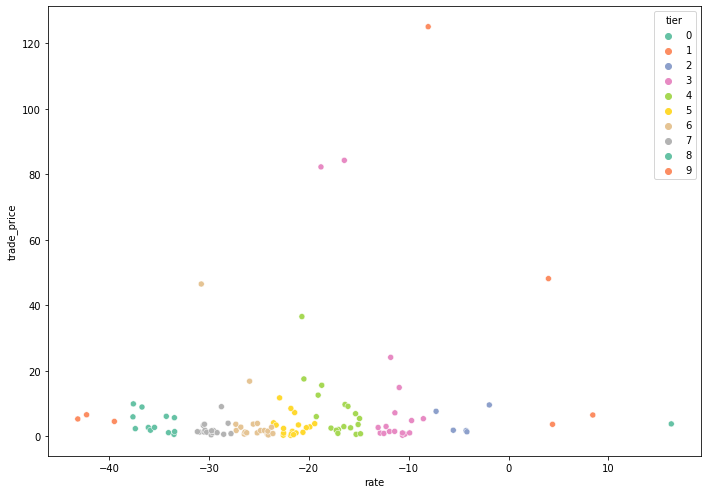

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(ax=ax,x='rate', y='trade_price', hue='tier', data=df_tier, palette="Set2")

In [57]:
from IPython.core.display import display, HTML
from copy import deepcopy

def makeTierMark(x):
    return '<img src= ' + './image/icon-champtier-'+str(x)+'.png' + ' width=22 height=24>'

def makeHTML(feature_df) :    
    feature_df = deepcopy(feature_df)
    feature_df=feature_df.astype(str)
    #feature_df['img'] = 'https://ssl.pstatic.net/imgfinance/chart/mobile/candle/day/'+feature_df['단축코드']+'_end.png'
    #feature_df['img'] = '<img src = \'' + feature_df['img'] + '\' weight=300 height=200>'
    
    feature_df['티어'] =feature_df['티어'].map(lambda x : makeTierMark(x))

    for index,column in enumerate(feature_df.columns):
        feature_df[column] = 'col'+str(index+1)+feature_df[column]
    
    feature_df.columns = ['1 코인','2 상승률','3 거래액(억)','4 티어']

    f=open('./fixed-column-table/Table_Fixed_Column/header.txt', 'r')
    header = f.read()

    f=open('./fixed-column-table/Table_Fixed_Column/js.txt', 'r')
    js = f.read()

    df_html = feature_df.to_html(escape=False)

    df_html = header + df_html + js

    return df_html

In [58]:
df_tier = df_tier.drop('tier_val',axis=1)
df_tier = df_tier.reset_index()

In [59]:
df_tier['rate'] = df_tier['rate'].map(lambda x : round(x,2))
df_tier['trade_price'] = df_tier['trade_price'].map(lambda x : round(x,2))
df_tier.columns = ['코인','상승률','거래액(억)','티어']
html = makeHTML(df_tier[:20])
html = html.replace('<table border=\"1\" class=\"dataframe\">','<table>')
html=html.replace('<tr','<tr class=\"row100 body\"')

for index,column in enumerate(df_tier.columns):
    html=html.replace('<td>col'+str(index+1),'<td class=\"cell100 column'+str(index+1)+'\">')
    html=html.replace('<th>'+str(index+1)+' ','<th class=\"cell100 column'+str(index+1)+'\">')
HTML(html)

,코인,상승률,거래액(억),티어
0,KRW-SXP,16.3,3.82,
1,KRW-WAVES,8.44,6.53,
2,KRW-TFUEL,4.0,48.15,
3,KRW-RFR,4.41,3.69,
4,KRW-BTC,-8.05,125.01,
5,KRW-UPP,-7.25,7.66,
6,KRW-AXS,-4.25,1.77,
7,KRW-KAVA,-5.53,1.89,
8,KRW-MVL,-1.92,9.6,
9,KRW-HBAR,-4.17,1.41,


In [60]:
with open('./fixed-column-table/Table_Fixed_Column/html_file.html', 'w',encoding='utf-8') as f:
    f.write(html)